<a href="https://colab.research.google.com/github/LuminaX-alt/AI-Based-stock-prediction/blob/main/VC1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from google.colab import files
import io

In [ ]:
# Upload the CSV file containing the stock data
uploaded = files.upload()

# Assuming the uploaded file is named 'AAPL.csv'
file_name = list(uploaded.keys())[0]

Saving Stocks_market.csv to Stocks_market.csv


Saving BNF_2013.csv to BNF_2013.csv


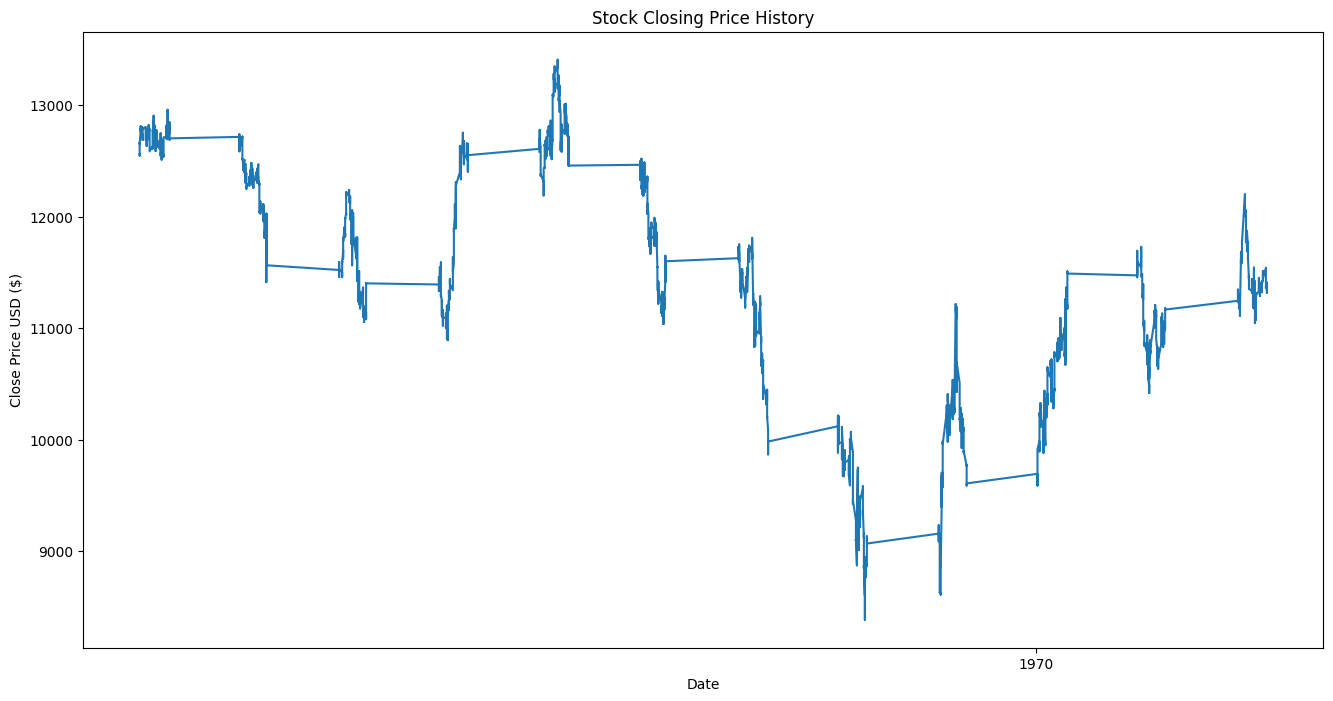

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


74341/74341 ━━━━━━━━━━━━━━━━━━━━ 1820s 24ms/step - loss: 2.7265e-04
582/582 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step


<ipython-input-30-107e4413976c>:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


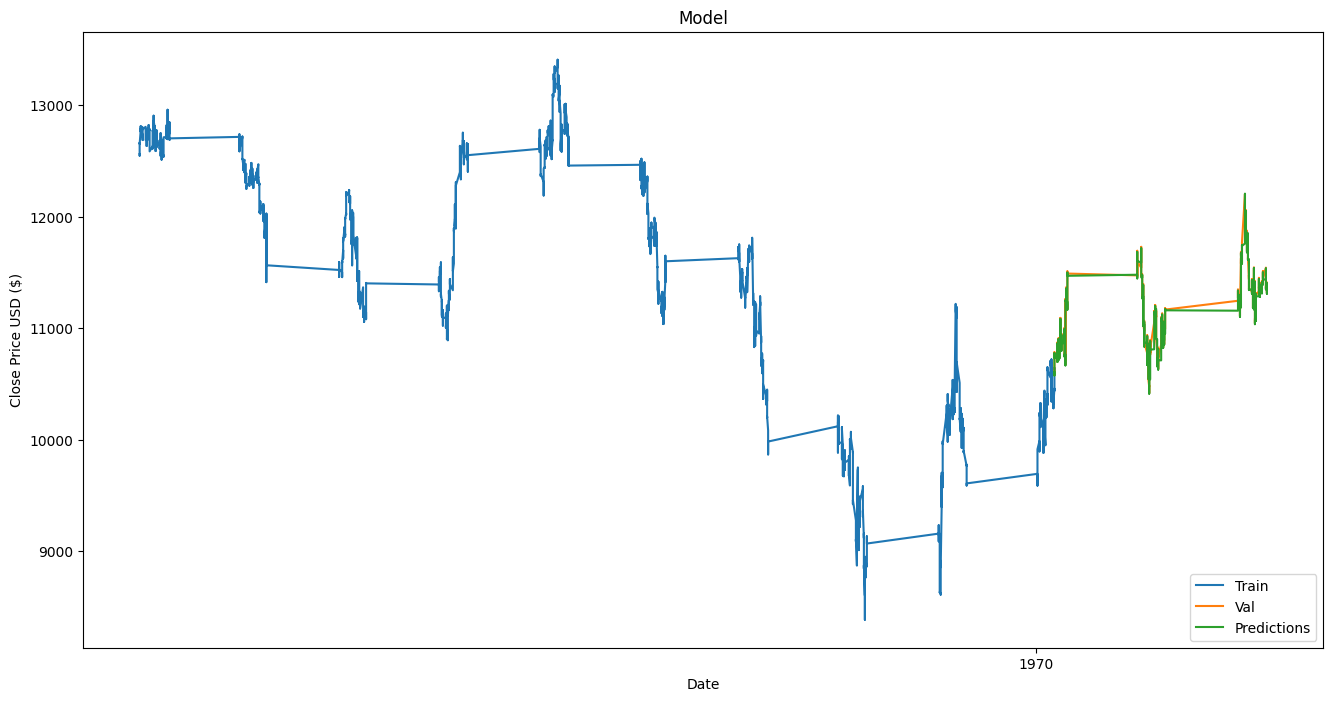

,Close,Predictions
Date,,
1970-01-01 00:00:00.020131231,11395.20,11386.701172
1970-01-01 00:00:00.020131231,11387.50,11384.124023
1970-01-01 00:00:00.020131231,11388.20,11376.141602
1970-01-01 00:00:00.020131231,11386.95,11377.515625
1970-01-01 00:00:00.020131231,11391.40,11376.271484


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from google.colab import files
import io

# Upload the CSV file containing the stock data
uploaded = files.upload()

# Assuming the uploaded file is named 'AAPL.csv'
file_name = list(uploaded.keys())[0]

# Load the dataset with enhanced error handling
def load_csv(file_name):
    encodings = ['utf-8', 'ISO-8859-1', 'latin1']
    for enc in encodings:
        try:
            return pd.read_csv(io.BytesIO(uploaded[file_name]), encoding=enc)
        except UnicodeDecodeError:
            continue
        except pd.errors.ParserError:
            continue
    raise ValueError("Unable to read the CSV file with the provided encodings")

df = load_csv(file_name)

# Convert the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Plot the closing price history
plt.figure(figsize=(16,8))
plt.title('Stock Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.show()

# Filter the closing prices and scale the data
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil(len(dataset) * .8))

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Create the training dataset
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Create the testing dataset
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# Print the valid and predicted prices
valid.tail()

Saving BNF_2020.csv to BNF_2020.csv


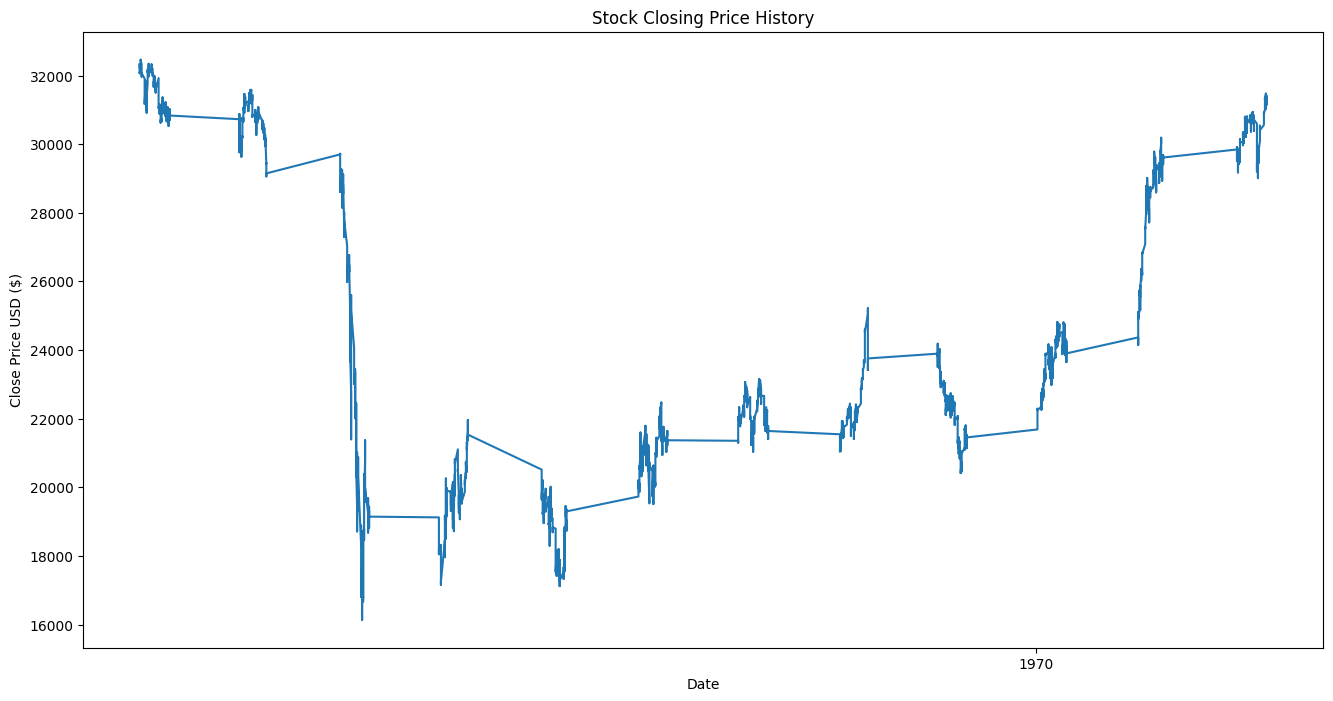

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75780/75780 ━━━━━━━━━━━━━━━━━━━━ 2652s 35ms/step - loss: 3.2071e-04
593/593 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step


<ipython-input-1-2d1fd3012b40>:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


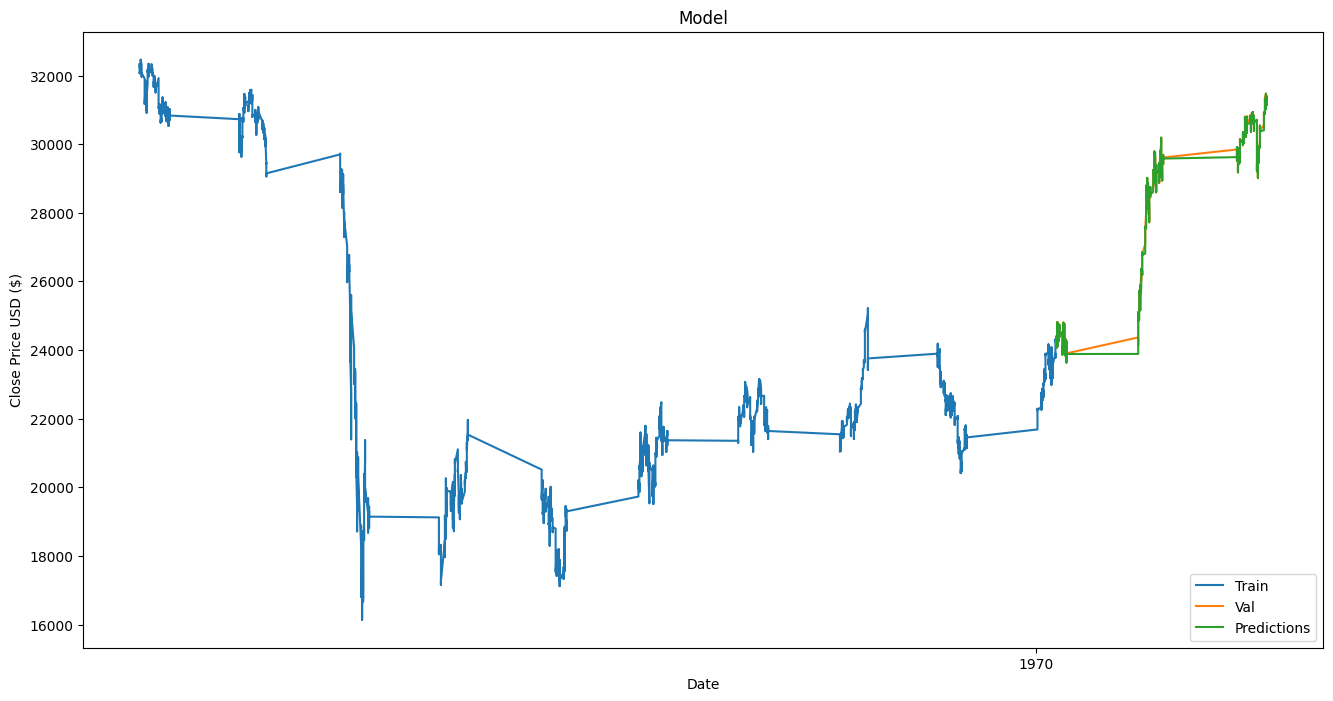

                                  Close   Predictions
Date                                                 
1970-01-01 00:00:00.020201231  31255.85  31222.212891
1970-01-01 00:00:00.020201231  31251.60  31238.714844
1970-01-01 00:00:00.020201231  31237.80  31231.546875
1970-01-01 00:00:00.020201231  31241.20  31221.074219
1970-01-01 00:00:00.020201231  31264.05  31226.808594
Mean Squared Error (MSE): 610.3676830905708
Mean Absolute Error (MAE): 16.736449892696083


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from google.colab import files
import io
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Upload the CSV file containing the stock data
uploaded = files.upload()

# Assuming the uploaded file is named 'AAPL.csv'
file_name = list(uploaded.keys())[0]

# Load the dataset with enhanced error handling
def load_csv(file_name):
    encodings = ['utf-8', 'ISO-8859-1', 'latin1']
    for enc in encodings:
        try:
            return pd.read_csv(io.BytesIO(uploaded[file_name]), encoding=enc)
        except UnicodeDecodeError:
            continue
        except pd.errors.ParserError:
            continue
    raise ValueError("Unable to read the CSV file with the provided encodings")

df = load_csv(file_name)

# Convert the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Plot the closing price history
plt.figure(figsize=(16,8))
plt.title('Stock Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.show()

# Filter the closing prices and scale the data
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil(len(dataset) * .8))

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Create the training dataset
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Create the testing dataset
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# Print the valid and predicted prices
print(valid.tail())

# Calculate and display evaluation metrics
mse = mean_squared_error(valid['Close'], valid['Predictions'])
mae = mean_absolute_error(valid['Close'], valid['Predictions'])
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

In [ ]:
!pip install flask-ngrok pandas numpy matplotlib scikit-learn tensorflow

In [ ]:
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Save the uploaded file to the content directory
for filename in uploaded.keys():
    file_path = '/content/' + filename
    with open(file_path, 'wb') as f:
        f.write(uploaded[filename])

print(f"File uploaded and saved to {file_path}")

Saving BNF_2020.csv to BNF_2020 (1).csv
File uploaded and saved to /content/BNF_2020 (1).csv


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75780/75780 ━━━━━━━━━━━━━━━━━━━━ 2271s 30ms/step - loss: 2.7852e-04
593/593 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step


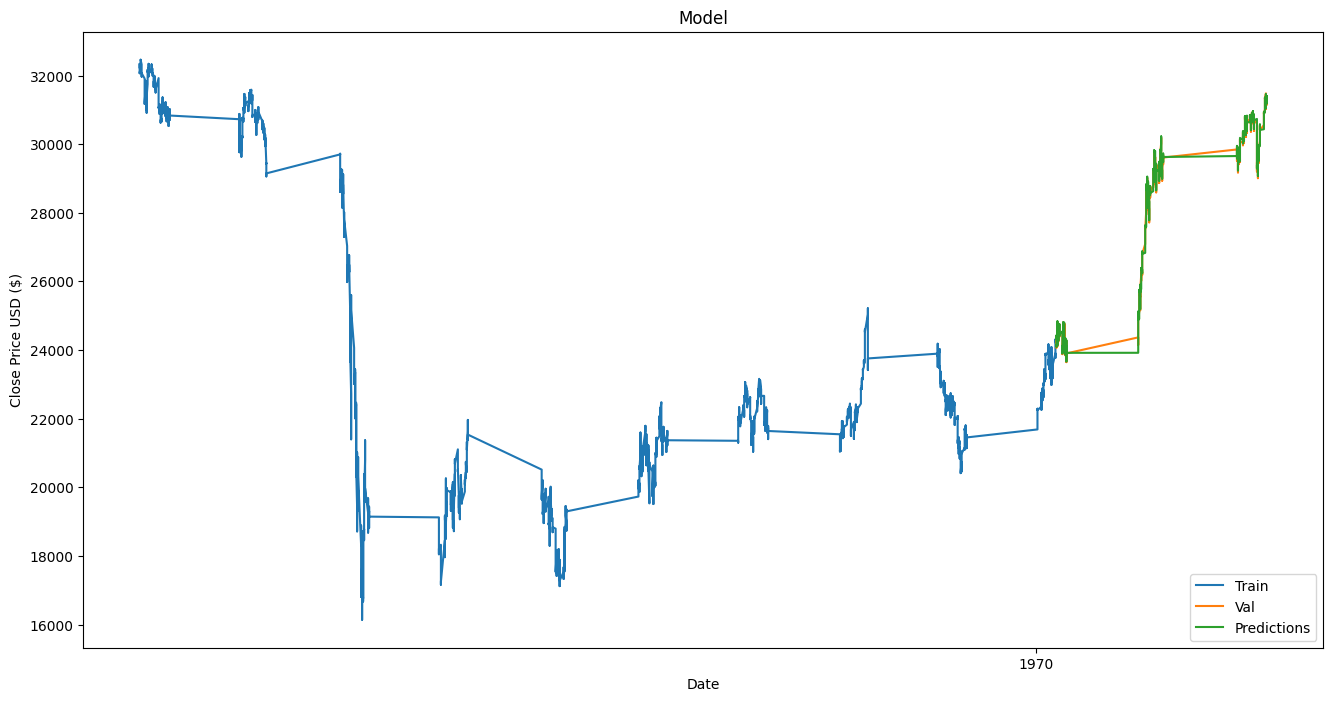

                                  Close   Predictions  Profit/Loss
Date                                                              
1970-01-01 00:00:00.020201020  24083.30  24133.917969    50.617969
1970-01-01 00:00:00.020201020  24097.25  24109.054688    11.804688
1970-01-01 00:00:00.020201020  24102.00  24116.253906    14.253906
1970-01-01 00:00:00.020201020  24098.65  24117.457031    18.807031
1970-01-01 00:00:00.020201020  24073.30  24115.074219    41.774219
...                                 ...           ...          ...
1970-01-01 00:00:00.020201231  31238.90  31254.748047    15.848047
1970-01-01 00:00:00.020201231  31255.85  31257.640625     1.790625
1970-01-01 00:00:00.020201231  31251.60  31269.058594    17.458594
1970-01-01 00:00:00.020201231  31237.80  31266.593750    28.793750
1970-01-01 00:00:00.020201231  31241.20  31258.509766    17.309766

[18004 rows x 3 columns]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

def train_and_predict(file_path):
    # Load the data
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

    # Preprocess the data
    data = df.filter(['Close'])
    dataset = data.values
    training_data_len = int(np.ceil(len(dataset) * .8))

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)

    train_data = scaled_data[0:int(training_data_len), :]
    x_train = []
    y_train = []

    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(x_train, y_train, batch_size=1, epochs=1)

    # Create the testing data set
    test_data = scaled_data[training_data_len - 60:, :]
    x_test = []
    y_test = dataset[training_data_len:, :]

    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])

    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    # Get the model's predicted price values
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)

    # Calculate profit/loss
    valid = data[training_data_len:].copy()
    valid['Predictions'] = predictions
    valid['Profit/Loss'] = valid['Predictions'] - valid['Close']
    suggestions = valid[valid['Profit/Loss'] > 0]

    # Plot the data
    train = data[:training_data_len]
    plt.figure(figsize=(16, 8))
    plt.title('Model')
    plt.xlabel('Date')
    plt.ylabel('Close Price USD ($)')
    plt.plot(train['Close'])
    plt.plot(valid[['Close', 'Predictions']])
    plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
    plt.show()

    return suggestions[['Close', 'Predictions', 'Profit/Loss']]

# Train the model and display the results
suggestions = train_and_predict(file_path)
print(suggestions)

In [ ]:
!pip install flask flask-ngrok yfinance scikit-learn pandas numpy matplotlib

In [ ]:
# Download ngrok
!wget -q https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip -q ngrok-stable-linux-amd64.zip

# Authenticate ngrok
!./ngrok authtoken 2siQYu9TFGqrtKm5JYg1n9d20BJ_WXBAHPVhkbdZTR554Lxe

replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
# Start ngrok on port 5000
get_ipython().system_raw('./ngrok http 5000 &')

In [ ]:
# This appears to be output from a command, not code requiring correction.
# To avoid the IndentationError, convert this block to a comment or a string literal.
'''
Account                       eng23ec0088@dsu.edu.in (Plan: Free)
Version                       3.2.1
Region                        United States (us)
Web Interface                 http://127.0.0.1:4040
Forwarding                    http://YOUR_NGROK_ID.ngrok.io -> http://localhost:5000
Forwarding                    https://YOUR_NGROK_ID.ngrok.io -> http://localhost:5000

Connections                   ttl     opn     rt1     rt5     p50     p90
                               0       0       0.00    0.00    0.00    0.00
'''

'\nAccount                       eng23ec0088@dsu.edu.in (Plan: Free)\nVersion                       3.2.1\nRegion                        United States (us)\nWeb Interface                 http://127.0.0.1:4040\nForwarding                    http://YOUR_NGROK_ID.ngrok.io -> http://localhost:5000\nForwarding                    https://YOUR_NGROK_ID.ngrok.io -> http://localhost:5000\n\nConnections                   ttl     opn     rt1     rt5     p50     p90\n                               0       0       0.00    0.00    0.00    0.00\n'

In [ ]:
import requests
import time

# Wait a few seconds for ngrok to initialize
time.sleep(15)  # Increased sleep time to 15 seconds

# Get the public URL from ngrok
try:
    ngrok_response = requests.get('http://localhost:4040/api/tunnels')
    ngrok_response.raise_for_status()  # Raise an exception for bad status codes
    ngrok_url = ngrok_response.json()['tunnels'][0]['public_url']
    print(f'Public URL: {ngrok_url}')
except requests.exceptions.RequestException as e:
    print(f"Error connecting to ngrok: {e}")
    print("Please ensure ngrok is running and accessible on port 4040.")

Error connecting to ngrok: HTTPConnectionPool(host='localhost', port=4040): Max retries exceeded with url: /api/tunnels (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7bee101fe0d0>: Failed to establish a new connection: [Errno 111] Connection refused'))
Please ensure ngrok is running and accessible on port 4040.


In [ ]:
!pip install flask yfinance scikit-learn pandas numpy matplotlib localtunnel

ERROR: Could not find a version that satisfies the requirement localtunnel (from versions: none)
ERROR: No matching distribution found for localtunnel
